## Metrics for Procore Webhook delivery delays

In [9]:
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
data = pd.DataFrame.from_csv('./recent_hooks.csv', index_col=None)

In [11]:
data["procore_timestamp"] = pd.to_datetime(data["procore_timestamp"])
data["recieved_timestamp"] = pd.to_datetime(data["recieved_timestamp"])

In [12]:
recent = data.sort_values(by="recieved_timestamp")

In [13]:
recent["time_delta_hours"] = ((recent["recieved_timestamp"] - recent["procore_timestamp"]).dt.total_seconds() / 60) / 60

### We have an 8 hour reporting obligation, how many events are delivered within an 8 hour window?

In [14]:
num_late = recent[recent["time_delta_hours"] > 8].shape[0]
num_total = recent.shape[0]
pct = (num_late / num_total) * 100

print("Time Period: 23 days")
print("Total hooks: {0}".format(num_total))
print("Hooks later than 8hr: {0}".format(num_late))
print("Percent of hooks delivered within 8hrs: {0}%".format(100 - round(pct,2)))

Time Period: 23 days
Total hooks: 13966
Hooks later than 8hr: 1129
Percent of hooks delivered within 8hrs: 91.92%


### Histogram of delay for all delays greater than 1hr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c953bc780>]], dtype=object)

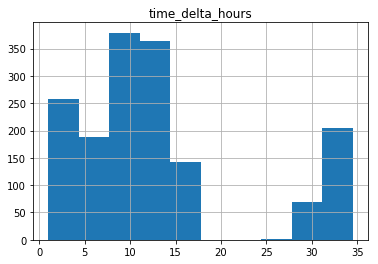

In [7]:
recent[recent["time_delta_hours"] > 1].hist(column="time_delta_hours")

### Construction a table showing daily delay metrics

In [8]:
times_only = recent[['procore_timestamp','time_delta_hours']]
times_only["is_delayed"] = times_only["time_delta_hours"] >= 1
times_only["is_hook"] = 1
times_only["delayed_delta_mean"] = times_only[times_only["is_delayed"] == True]["time_delta_hours"]
times_only["delayed_delta_max"] = times_only["delayed_delta_mean"]

times_only = times_only.groupby(by=times_only['procore_timestamp'].dt.date).agg({
    "delayed_delta_mean": np.nanmean,
    "delayed_delta_max": np.max,
    "is_delayed": np.sum,
    "is_hook": np.sum
})

times_only["delayed_delta_mean"] = round(times_only["delayed_delta_mean"].fillna(0),2)
times_only["delayed_delta_max"] = round(times_only["delayed_delta_max"].fillna(0),2)
times_only["is_delayed"] = times_only["is_delayed"].astype(np.int64)
times_only["percent_delayed"] = round((times_only["is_delayed"] / times_only["is_hook"]) * 100, 1)
times_only = times_only.rename(columns={
    "delayed_delta_mean": "Avg Delay(hrs)", 
    "delayed_delta_max": "Max Delay(hrs)",
    "is_delayed": "Num Delayed",
    "is_hook": "Num Total",
    "percent_delayed": "Pct Delayed"
})

times_only

/home/ryan/anaconda3/lib/python3.6/site-packages/pandas/core/groupby.py:842: RuntimeWarning: Mean of empty slice
  f = lambda x: func(x, *args, **kwargs)


,Avg Delay(hrs),Max Delay(hrs),Num Delayed,Num Total,Pct Delayed
procore_timestamp,,,,,
2021-10-27,0.00,0.00,0,1103,0.0
2021-10-28,24.51,34.52,426,450,94.7
2021-10-29,14.01,30.49,435,435,100.0
2021-10-30,6.60,6.72,11,204,5.4
2021-10-31,0.00,0.00,0,74,0.0
2021-11-01,0.00,0.00,0,917,0.0
2021-11-02,0.00,0.00,0,684,0.0
2021-11-03,0.00,0.00,0,1137,0.0
2021-11-04,1.62,2.30,67,1598,4.2
